# Credit Card Fraud Detection using Artificial Neural Networks

## Data Exploration Notebook

This notebook performs **Exploratory Data Analysis (EDA)** on the Kaggle Credit Card Fraud dataset.

**Objectives:**
- Load and inspect the dataset
- Understand class imbalance
- Explore feature distributions (`Time`, `Amount`)
- Visualize correlations
- Save figures for later use in the case study report


In [1]:
# ===============================
# Imports and Global Settings
# ===============================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reproducibility
SEED = 42
np.random.seed(SEED)

# Plot style
sns.set(style="whitegrid", context="notebook")

# Paths
DATA_PATH = "../data/creditcard.csv"
RESULTS_DIR = "../results"
os.makedirs(RESULTS_DIR, exist_ok=True)

print("Setup complete.")

Setup complete.


## Load Dataset

In [2]:
# ===============================
# Load the Dataset
# ===============================

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(
        "creditcard.csv not found. Make sure it exists in the data/ directory."
    )

df = pd.read_csv(DATA_PATH)

print("Dataset loaded successfully")
print("Shape:", df.shape)

df.head()

Dataset loaded successfully
Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Basic Dataset Information

In [3]:
# ===============================
# Dataset Overview
# ===============================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# ===============================
# Summary Statistics
# ===============================

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.384974e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.494498e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.414189e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## Class Distribution (Highly Imbalanced)

In [5]:
# ===============================
# Class Distribution
# ===============================

class_counts = df['Class'].value_counts()
class_percentages = class_counts / len(df) * 100

print("Class Distribution:")
print(class_counts)
print("\nPercentage:")
print(class_percentages)

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage:
Class
0    99.827251
1     0.172749
Name: count, dtype: float64


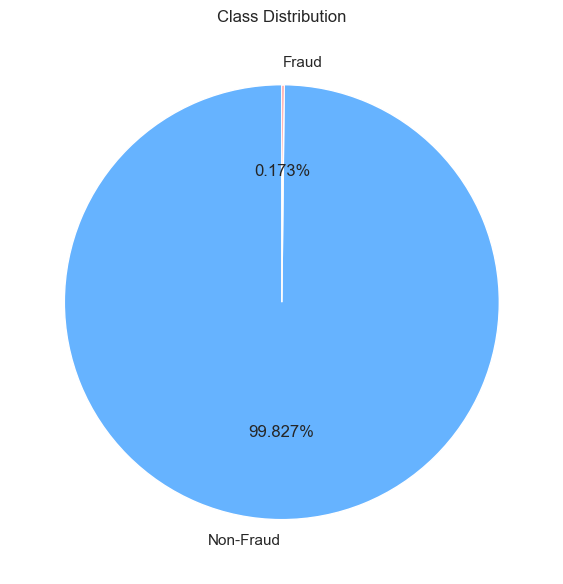

In [6]:
# ===============================
# Pie Chart for Class Distribution
# ===============================

plt.figure(figsize=(6, 6))
plt.pie(
    class_counts,
    labels=['Non-Fraud', 'Fraud'],
    autopct='%1.3f%%',
    startangle=90,
    colors=['#66b3ff', '#ff6666']
)
plt.title('Class Distribution')
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "class_distribution_pie.png"))
plt.show()

## Distribution of `Amount` Feature

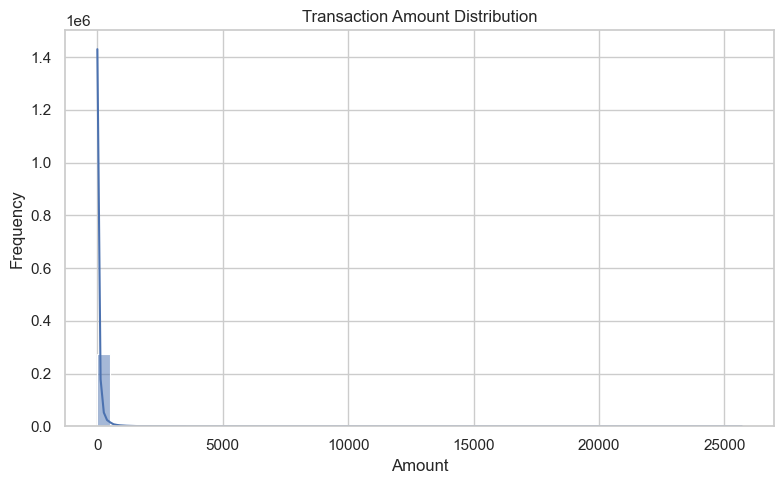

In [10]:
# ===============================
# Amount Distribution
# ===============================

plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "amount_distribution.png"))
plt.show()

## Distribution of `Time` Feature

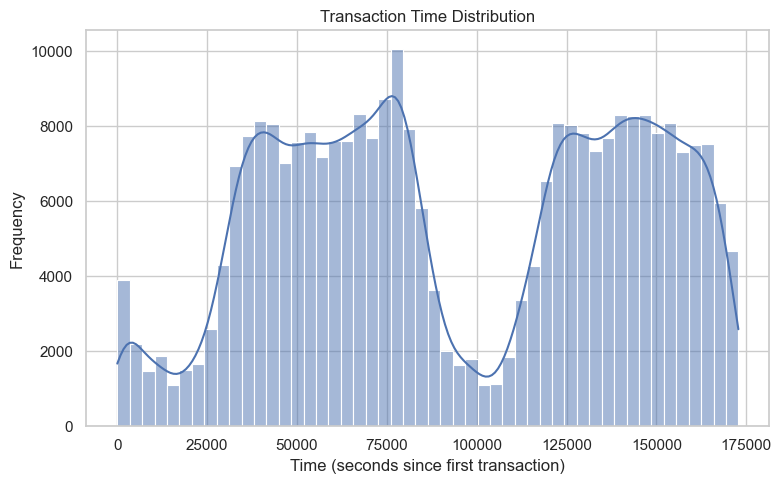

In [9]:
# ===============================
# Time Distribution
# ===============================

plt.figure(figsize=(8, 5))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "time_distribution.png"))
plt.show()

## Correlation Heatmap (Sampled for Efficiency)

To reduce memory usage and rendering time, we compute correlations on a **random sample** of the dataset.

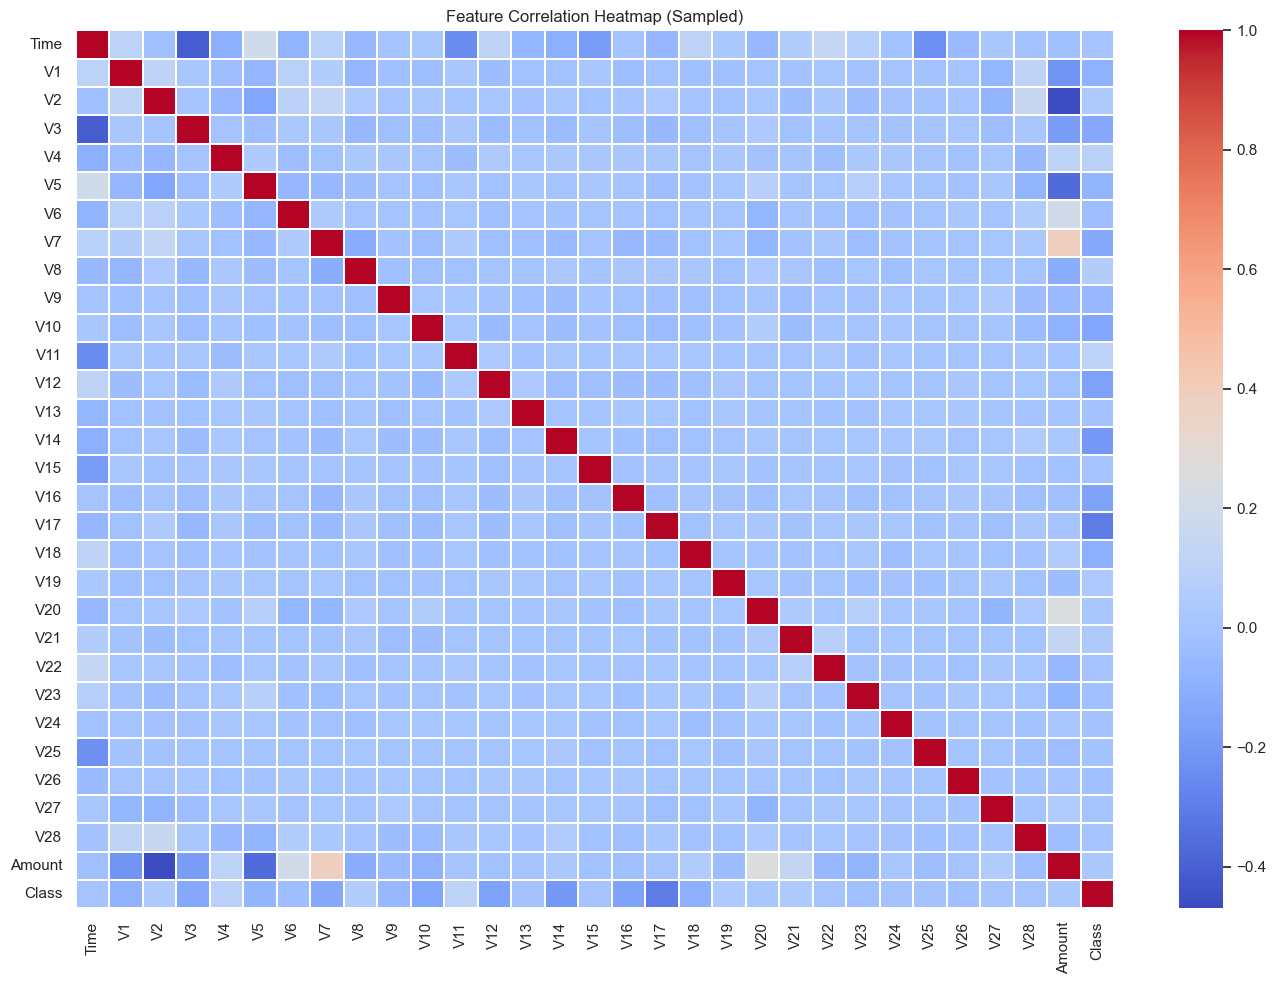

In [11]:
# ===============================
# Correlation Heatmap (Sampled)
# ===============================

sample_df = df.sample(n=10000, random_state=SEED)
corr_matrix = sample_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.1)
plt.title('Feature Correlation Heatmap (Sampled)')
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "correlation_heatmap.png"))
plt.show()

## Key Observations

- The dataset is **extremely imbalanced** (~0.17% fraud cases)
- PCA-transformed features (`V1`–`V28`) show low linear correlation
- `Amount` and `Time` features are skewed and require standardization
- Accuracy alone is not suitable; **AUC, Precision-Recall, and F1-score** are more meaningful

Next step: **Data preprocessing and SMOTE-based balancing**